## Hierarchical Clustering: Iteration 1

Data is composed of organizations in Ruyigi, Burundi. 

In [28]:
#names are already standardized 
#nulls have already been dropped 

import pandas as pd 

df= pd.read_csv('/Users/alejandrabudar/Downloads/ruyigi_mini.csv')
df

,Organization Name,Concat
0,Eglise Anglicaine,"International non governmental organization, N..."
1,International Organization for Migrations,"Multilateral, Child Protection, Humanitarian"
2,International Rescue Committee,"International non governmental organization, C..."
3,Terre Des Hommes,"International non governmental organization, D..."
4,Food for the Hungry,"International non governmental organization, E..."
5,Action Aid,"International non governmental organization, E..."
6,Jesuit Refugee Service,"International non governmental organization, E..."
7,Jesuit Refugee Service,"International non governmental organization, F..."
8,Action Aid,"International non governmental organization, F..."
9,Lutheran World Federation,"International non governmental organization, F..."


In [21]:
labels1=[]

for x in df['Organization Name']:
    labels1.append(x)

In [12]:
description=[]

for x in df.Concat:
    x1= tokenize_only(x)
    description.append(x1)

In [7]:
import nltk
import re

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [8]:

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [9]:
stopwords = nltk.corpus.stopwords.words('english')

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

Tokenized and stemmed results

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(df.Concat)


/Applications/anaconda3/envs/mainenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [16]:
terms = tfidf_vectorizer.get_feature_names()
terms

['government',
 'government organ',
 'intern',
 'intern non',
 'intern non government',
 'nation',
 'nation non',
 'nation non government',
 'non',
 'non government',
 'non government organ',
 'protect',
 'protect humanitarian']

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


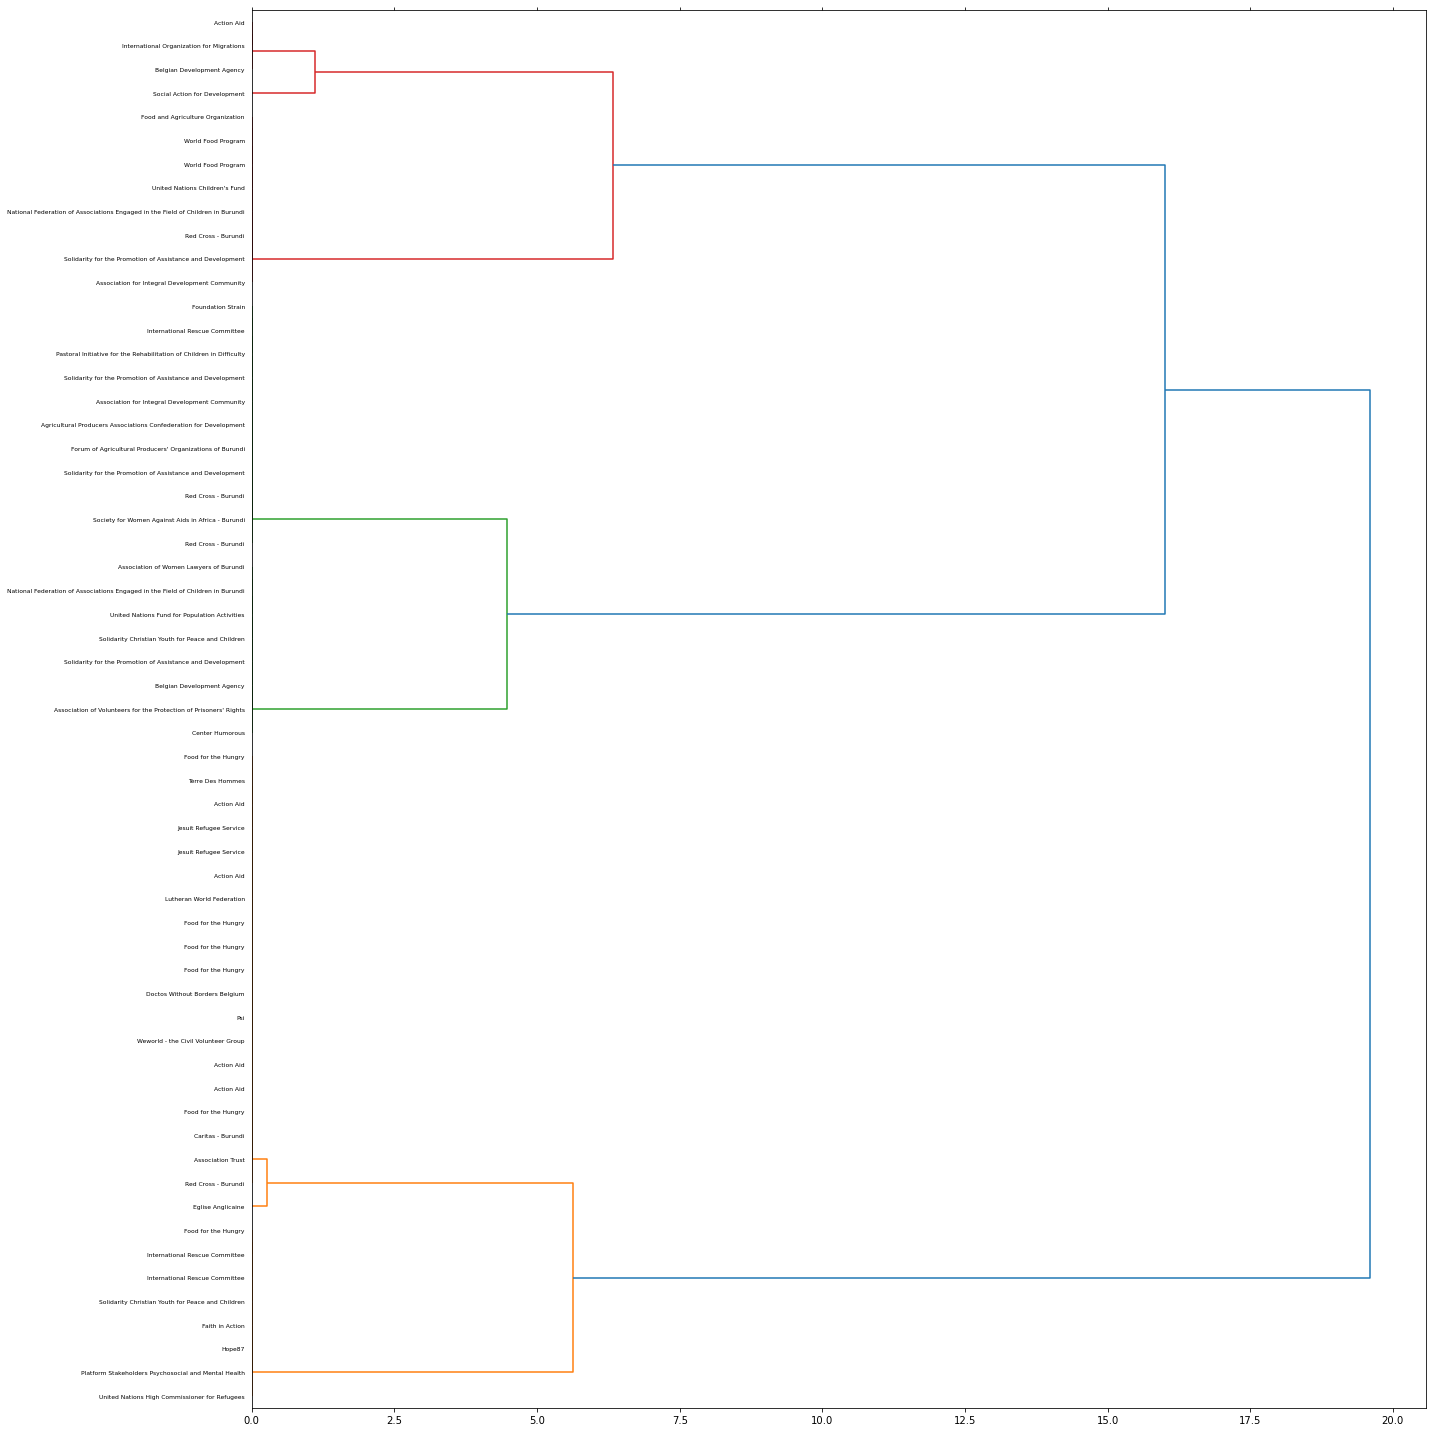

In [36]:
#all duplicates accuratey categorized except Red Cross-Burundi 

from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt 

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(20, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=labels1);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    labelbottom='on')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
#plt.savefig('/Users/alejandrabudar/Downloads/clusters.png', dpi=200) #save figure as ward_clusters